In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nqDataLoader as nq #data loading library

## importing the early_stage data set 

In [122]:
## importing the early stage dataset 
early_stage = pd.read_csv('GT_DataPD_MIT-CS2PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
early_stage.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1
0,1000,True,27,79.0,184.5,0.107179,56.866667,1424946827.1000_001_014.csv
1,1001,True,16,96.5,189.0,0.056286,118.000000,1427279751.1001_001_014.csv
2,1002,False,5,140.0,158.0,0.039519,119.037037,1426676689.1002_001_014.csv
3,1004,True,22,83.5,191.5,0.034853,74.266667,1429866367.1004_001_014.csv
4,1005,True,17,68.0,150.0,0.048307,74.969697,1430134526.1005_001_014.csv


## Calculating the SDI for early stage dataset 

In [123]:
SD_index = []
for index, row in early_stage.iterrows():
    fileloc = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( "data_MIT-CS2PD/" + early_stage.loc[index]['file_1'])
    fluctuations = []
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
    npFluctuations = np.array(fluctuations)
    sd_index_score = npFluctuations.std()
    SD_index.append(sd_index_score) 
    
    
early_stage["SDi"] = SD_index 

In [124]:
from scipy.stats import skew
TypingSkew =[]
for index, row in early_stage.iterrows():
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS2PD/' + early_stage.loc[index]['file_1'])
    skew1 = skew(htArr)
    TypingSkew.append(skew1)
   
    
    

early_stage['TypingSkew'] =TypingSkew

## preparing the dataset to only have SDi as a feature and the gt as the dependant variable

In [125]:
early_stage["gt"] = early_stage["gt"].astype(int)

early_stage.drop(["pID",'updrs108','afTap','sTap','nqScore','typingSpeed','file_1'], axis=1, inplace=True)
early_stage = early_stage[['SDi','TypingSkew','gt']]
print(len(early_stage))
early_stage.head()


54


,SDi,TypingSkew,gt
0,0.380584,8.366899,1
1,0.378429,3.633781,1
2,0.349012,3.924409,0
3,0.354817,0.901742,1
4,0.236304,0.843820,1


## importing the de_novo dataset

In [126]:
## importing the de-novo dataset 
de_novo = pd.read_csv('GT_DataPD_MIT-CS1PD.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
print(len(de_novo))
de_novo.head()

31


,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


## calculating the SDi for the de_novo dataset 

In [127]:
##using both files 
SD_index = []
for index, row in de_novo.iterrows():
    fileloc1 = row.file_1
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    
    fluctuations = []
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
    
    fileloc2 = row.file_2
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    for i in range(0,len(htArr)-1):
        row1 = htArr[i]
        row2 = htArr[i+1]
        temp1 = np.log(row1)
        temp2 = np.log(row2)
        result = temp2-temp1
        fluctuations.append(result)
        
    npFluctuations = np.array(fluctuations)
    sd_index_score = npFluctuations.std()
    SD_index.append(sd_index_score) 
    
    
de_novo["SDi"] = SD_index 
de_novo.head()

,pID,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2,SDi
0,11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv,0.564521
1,60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv,0.421491
2,67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv,0.448163
3,68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv,0.229087
4,70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv,0.319824


In [128]:
from scipy.stats import skew
TypingSkew =[]
for index, row in de_novo.iterrows():
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_1'])
    skew1 = skew(htArr)
    keyPressed, htArr, pressArr, releaseArr =  nq.getDataFiltHelper( 'data_MIT-CS1PD/' + de_novo.loc[index]['file_2'])
    skew2 = skew(htArr)
    TypingSkew.append((skew1+skew2)/2.0)
   
    
    

de_novo['TypingSkew'] =TypingSkew

## trimming the de_novo dataset to contain only the SDi as a feature and the gt as the target variable 

In [129]:
de_novo["gt"] = de_novo["gt"].astype(int)

de_novo.drop(["pID",'updrs108','afTap','sTap','nqScore','typingSpeed','file_1','file_2'], axis=1, inplace=True)
de_novo = de_novo[['SDi','TypingSkew','gt']]
de_novo.head()

,SDi,TypingSkew,gt
0,0.564521,4.721638,1
1,0.421491,2.103442,0
2,0.448163,0.905364,1
3,0.229087,0.586957,0
4,0.319824,0.608208,1


## splitting the de_novo patients to double the dataset size by considering file_2 of a patient a different 

## appending the datasets together

In [130]:
print(len(early_stage))
print(len(de_novo))
early_stage = de_novo.append(de_novo, ignore_index=True)
print(len(early_stage))

54
31
62


C:\Users\micoa\AppData\Local\Temp\ipykernel_13068\3852438946.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  early_stage = de_novo.append(de_novo, ignore_index=True)


## splitting the data into features and dependant variable and further splitting into train and testing data

In [131]:
X = early_stage.iloc[:, :-1].values
y = early_stage.iloc[:, -1].values

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-1.22589168, -0.18423336],
       [-0.11195786,  0.25444382],
       [ 0.09602974, -0.6630574 ],
       [-1.13408165, -0.51938403],
       [-0.92026147,  1.85110566],
       [-0.90476099, -0.89062314],
       [-1.16776355, -0.10702921],
       [ 0.44308632, -0.54007265],
       [ 0.09602974, -0.6630574 ],
       [-0.47348372, -0.29248978],
       [-0.01299493, -0.62056787],
       [-0.90476099, -0.89062314],
       [-0.48167697, -0.70182555]])

In [134]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
classifier.coef_

array([[0.98206325, 0.82260544]])

In [135]:
y_pred =  classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]]


Confusion matrix, without normalization
[[3 3]
 [4 3]]
Normalized confusion matrix
[[0.5        0.5       ]
 [0.57142857 0.42857143]]


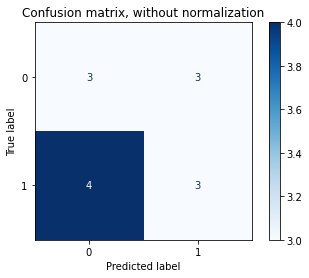

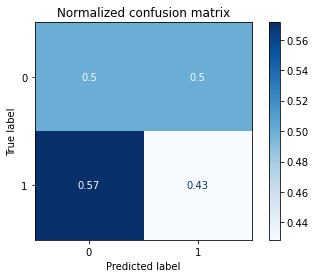

Accuracy score : 0.46153846153846156


In [136]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

## attempting to use K-neighrest neighbour 

In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [138]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]]


Confusion matrix, without normalization
[[4 2]
 [4 3]]
Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.57142857 0.42857143]]


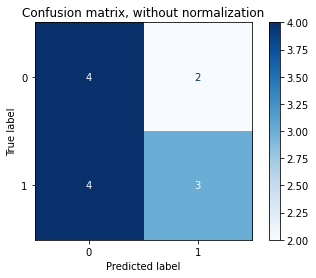

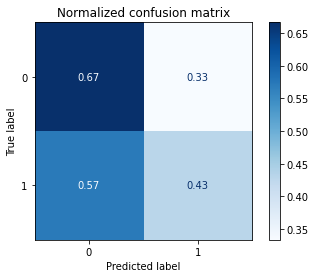

Accuracy Score : 0.5384615384615384


In [139]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy Score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))

In [140]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [141]:
y_pred =  classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]]


Confusion matrix, without normalization
[[5 1]
 [6 1]]
Normalized confusion matrix
[[0.83333333 0.16666667]
 [0.85714286 0.14285714]]


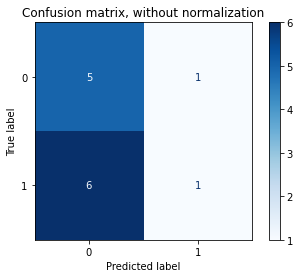

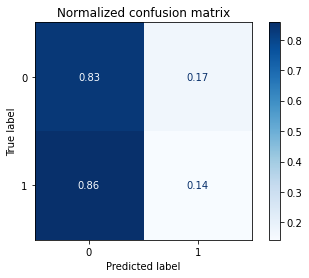

Accuracy score : 0.46153846153846156


In [142]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=None ,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
print("Accuracy score : " + str(accuracy_score(y_test, y_pred,  normalize=True, sample_weight=None)))